<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Oct20-21/DESI_EDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scienceplots

In [28]:
import numpy as np
from astropy.io import fits
from astropy.table import Table
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import scienceplots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
spec_file=fits.open("/content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25956.fits")

In [4]:
#Display the contect of the file, organized in different HDUs. each HDU can be of a different type.
spec_file.info()

Filename: /content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10  

In [5]:
#The FIBERMAP HDU contains information about the object that was observed,
# in particular we will be interested in the TARGETID, the unique identifier
# assigned to each object observed in DESI

fibermap=Table(spec_file["FIBERMAP"].data)
fibermap[1]

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789


In [101]:
#Lets save the TARGETIDs into one variable for future use
tids=fibermap["TARGETID"]
tids

39627776315097634
39627770271109740
39627770271109663
39627770271107659
39627770271108753
39627764227118638
39627770271108240
39627764227118438
39627776310907306
39627776310905753
39627770271107492


In [7]:
#Now, the spectra DESI observed for each quasar, i.e. for a given targetid,
#is saved in HDUs named  B_FLUX, R_FLUX, Z_FLUX.
#And the Wavelenght grids are in B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH HDUs respectively.
# B,R,Z correspond to the different bands of the DESI spectrographs.
# Lets access to the spectra, only b band for now,  and plot it.
bwave = spec_file["B_WAVELENGTH"].data
bflux = spec_file["B_FLUX"].data

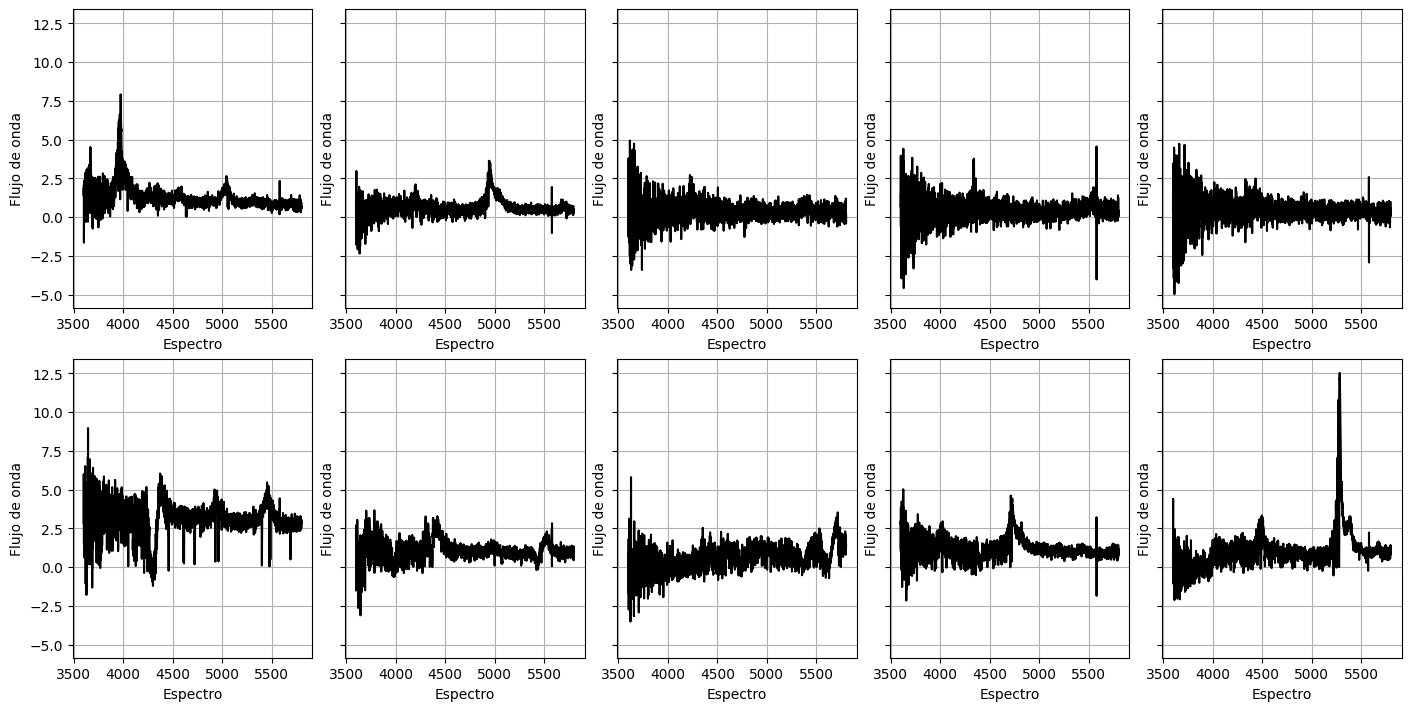

In [93]:
#Lets plot the first 10 spectra
nrows_ = 2
ncols_ = 5
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(14, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(bwave,bflux[i],'k')
  ax.set_xlabel('Espectro')
  ax.set_ylabel('Flujo de onda')
  ax.grid()


Ejercicio: Utilice el análisis PCA para encontrar los componentes principales que corresponden al espectro que tenemos. Hágalo primero para los espectros en un solo archivo, luego combine los datos de diferentes archivos y vuelva a realizar el PCA.

In [155]:
pca = PCA()
componentes_principales = pca.fit_transform(bflux)

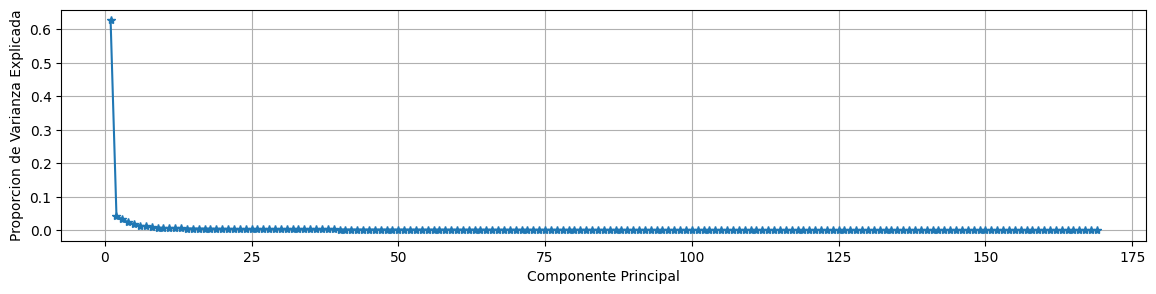

In [169]:
# Graficar la proporción de varianza explicada
plt.figure(figsize=(14,3))
PVE = pca.explained_variance_ratio_
plt.plot(np.arange(1,len(PVE) + 1), PVE, marker = '*')
plt.xlabel('Componente Principal')
plt.ylabel('Proporcion de Varianza Explicada')
plt.grid()
plt.show()

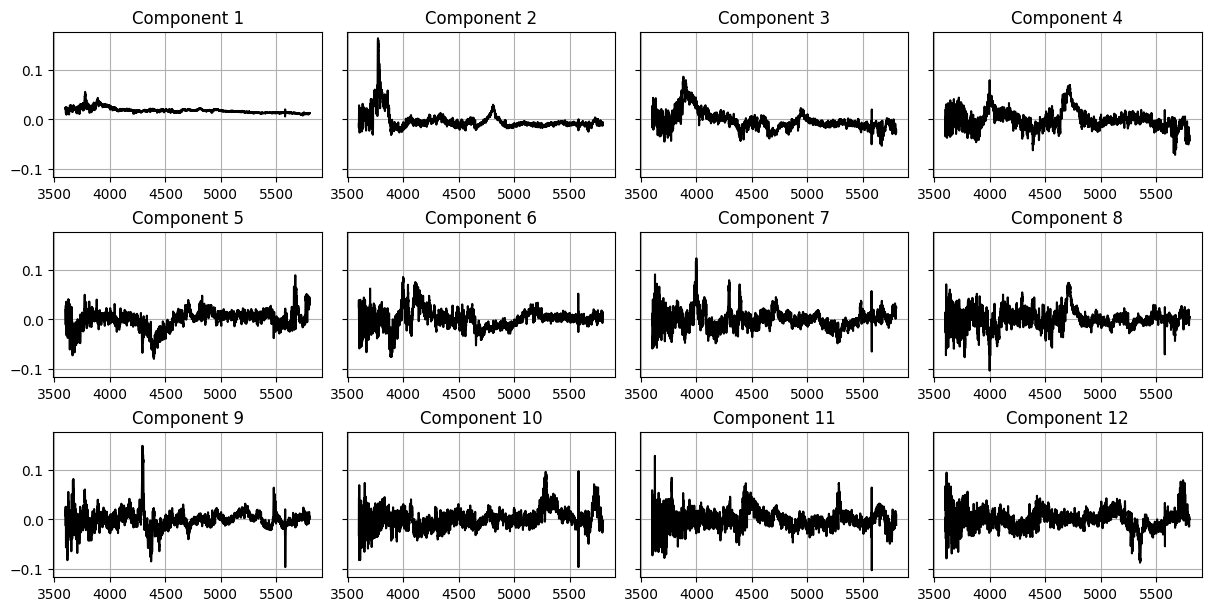

In [99]:
components = pca.components_
nrows_ = 3
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(12, 6), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(bwave, components[i], 'k')
  ax.set_title(f'Component {i+1}')
  ax.grid()

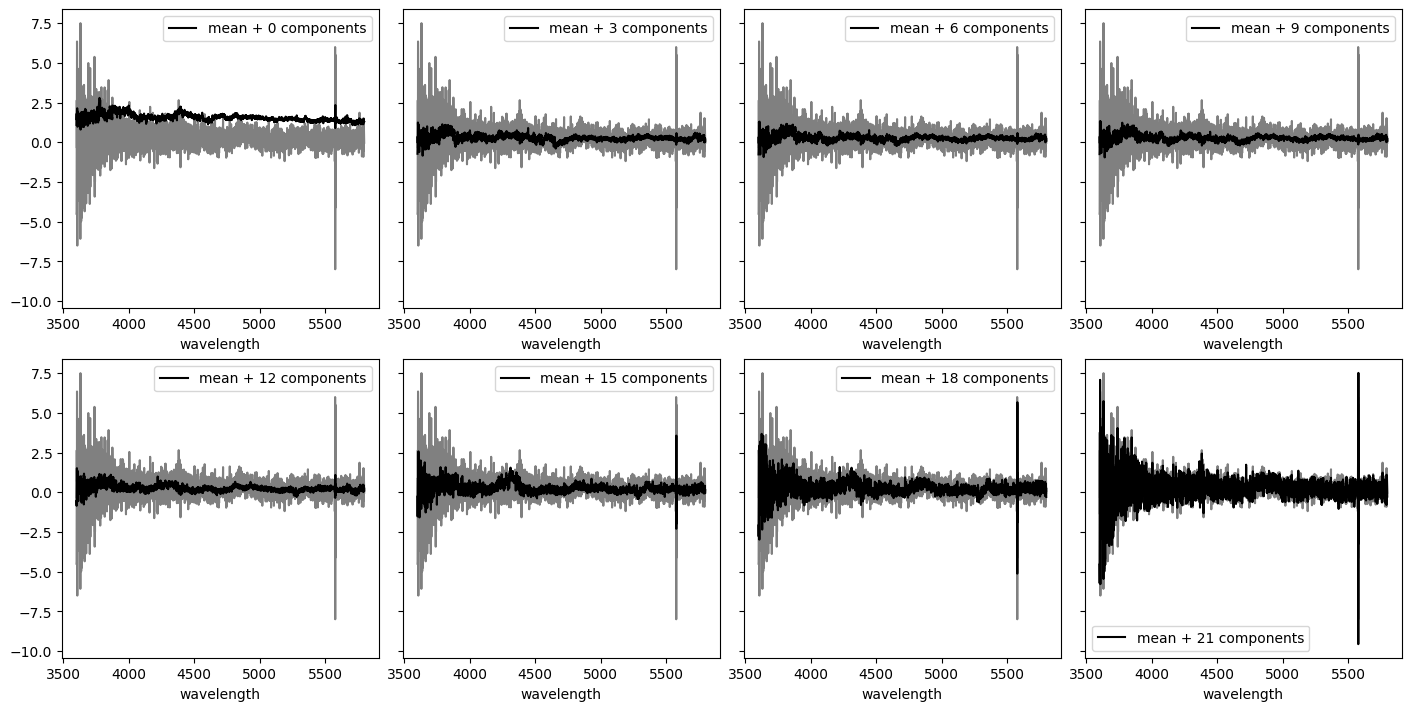

In [80]:
spec_mean = bflux.mean(0)
spec = bflux[48]
coeff = np.dot(components, spec-spec_mean)

nrows_ = 2
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(14, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, [0, 3, 6, 9, 12, 15, 18, 21] ):
#for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(bwave, spec,'-', color='gray')
  ax.plot(bwave, spec_mean + np.dot(coeff[:i], components[:i]), 'k',label = f'mean + {i} components')
  ax.legend()
  ax.set_xlabel('wavelength')

#Para todos los espectros arcivos
* coadd-sv3-dark-25956.fits
* coadd-sv3-dark-25965.fits
* coadd-sv3-dark-25971.fits
* coadd-sv3-dark-9930.fits

In [100]:
spec_file0=fits.open("/content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25965.fits")
spec_file1=fits.open("/content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-25971.fits")
spec_file2=fits.open("/content/drive/MyDrive/DESI_EDR/DESI_EDR/coadd-sv3-dark-9930.fits")

In [172]:
bflux_total=np.vstack([spec_file["B_FLUX"].data,spec_file0["B_FLUX"].data,spec_file1["B_FLUX"].data,spec_file2["B_FLUX"].data])

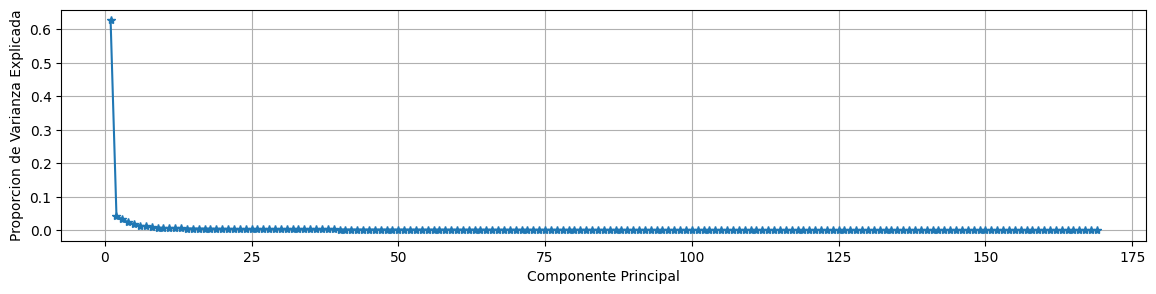

In [171]:
pca = PCA()
componentes_principales = pca.fit_transform(bflux_total)
plt.figure(figsize=(14,3))
PVE = pca.explained_variance_ratio_
plt.plot(np.arange(1,len(PVE)+1), PVE, marker = '*')
plt.xlabel('Componente Principal')
plt.ylabel('Proporcion de Varianza Explicada')
plt.grid()
plt.show()

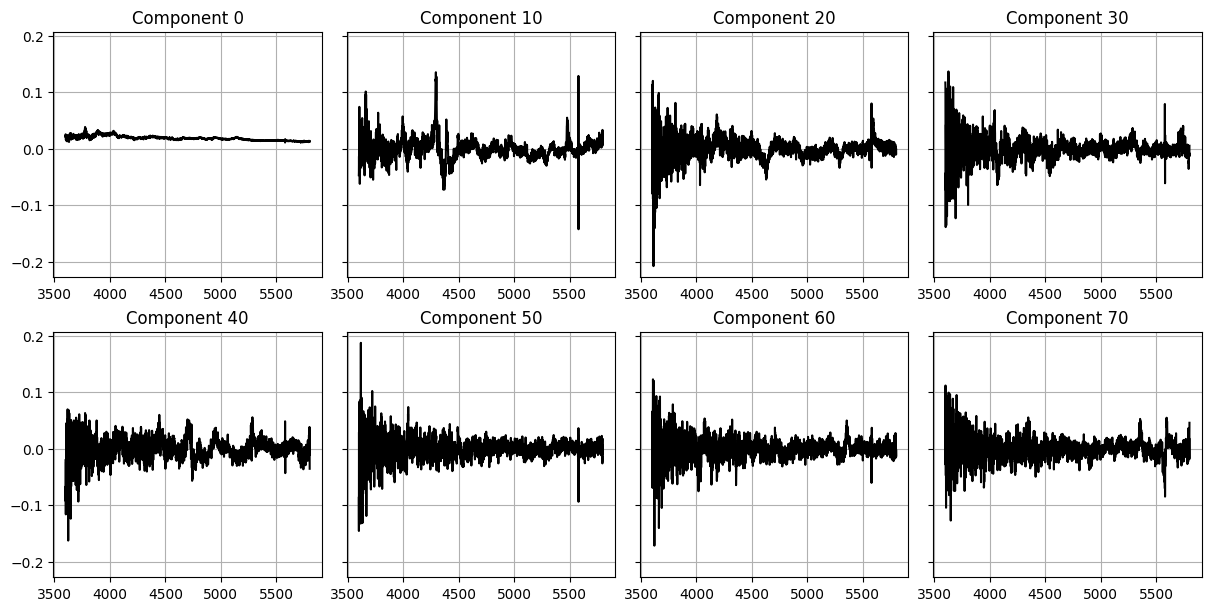

In [176]:
components = pca.components_
nrows_ = 2
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(12, 6), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat,  [0, 10, 20, 30, 40, 50, 60, 70] ):
  ax.plot(bwave, components[i], 'k')
  ax.set_title(f'Component {i}')
  ax.grid()

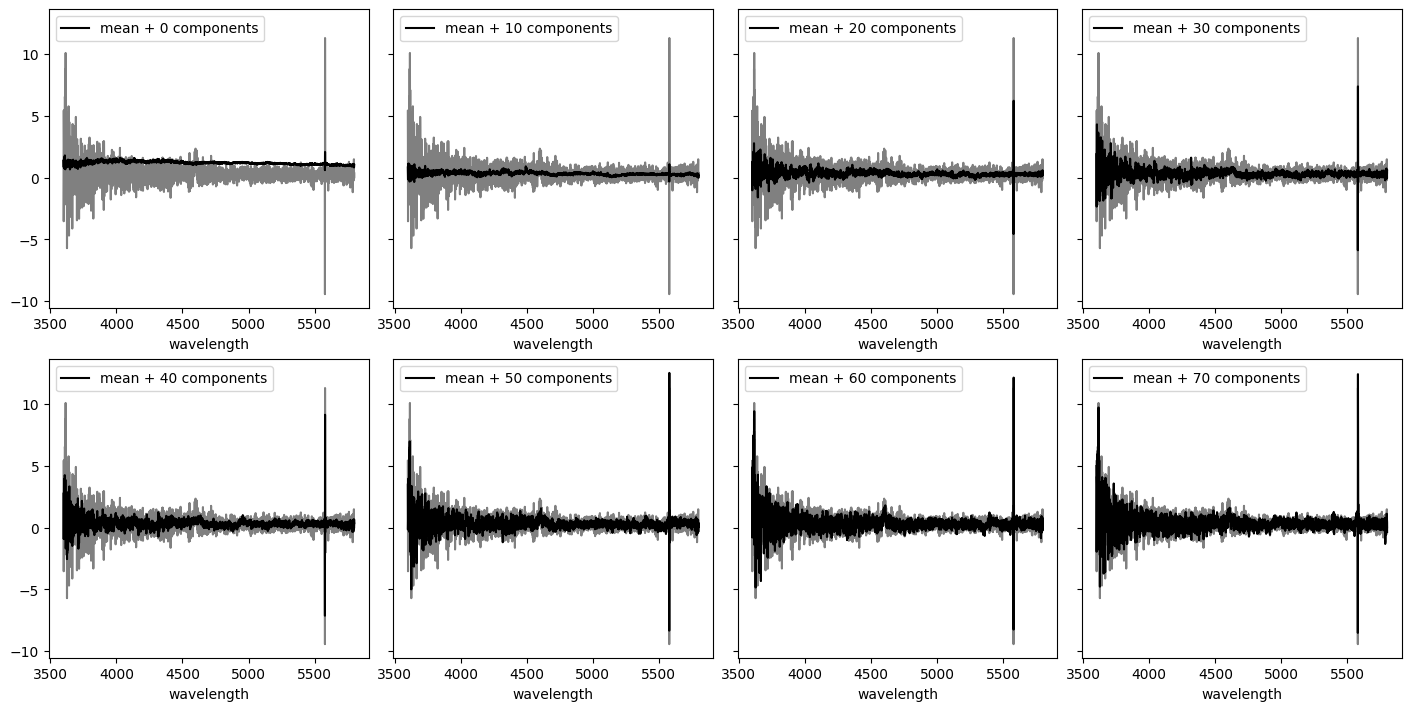

In [175]:
spec_mean = bflux_total.mean(0)
spec = bflux_total[100]
coeff = np.dot(components, spec-spec_mean)

nrows_ = 2
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(14, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, [0, 10, 20, 30, 40, 50, 60, 70] ):
#for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(bwave, spec,'-', color='gray')
  ax.plot(bwave, spec_mean + np.dot(coeff[:i], components[:i]), 'k',label = f'mean + {i} components')
  ax.legend()
  ax.set_xlabel('wavelength')

#-------------------------------------------------------------

In [11]:
#In this case we will read the redshift catalog as a table directly.
zcat=Table.read("/content/drive/MyDrive/DESI_EDR/DESI_EDR/zall-pix-edr-vac.fits",hdu=1)
#Display the redshift catalog.
zcat[1:2]

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42.14319,23.264242,991.4273,259.7222,39.521748,-1.0,-1.0,0.17083281,0.96268654,5.251736,0.17083387,0.96268857,5.2517376,0,4.0,0.6870925,0.05074602,-0.24529049,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.711764237454403,29.843726508418328,4,3600.0,1,1,-0.0055,0.008093207,-0.00375,0.0124197425,23.711789506441097,0.08703488,29.843712547212316,0.15683237,0.7471383,372.30658,0.26569176,72.09556,267.42313,1369.3308,512.4265,7.0431533,2.0375829,33027.3,74.371086,5933.8667,0.11593156,6770.363,34912.72,21.882227,107.211945,5.0268336e-05,251.30377,9.522035e-06,0.0,11056.078,6.403414e-05,50.626514,115.61087,33399.605,325.94055,6005.9624,267.53906,19195.771,35425.145,79.551895,224.8604,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216


In [17]:
#From the zcat table, the most important thing we will use is the TARGETID, the SURVEY, the SPECTYPE and the redshift Z.
#Lets reduce the table to just these variables.
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat[1:3]

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663


In [16]:
#Now lets reduce the table to contain only the elements for which the TARGETIDs that we identified in our spectra file are present
#For this we need to know that such files correspond to the SURVEY=sv3 (as indicated in the filename)
#So, lets make first a filter for sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat[1:3]

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663


In [21]:
#Now lets keep only the elements corresponding to the TARGETIDS we have in the spectrafile
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat[1:2]

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764222919195,sv3,QSO,2.5460148518383536


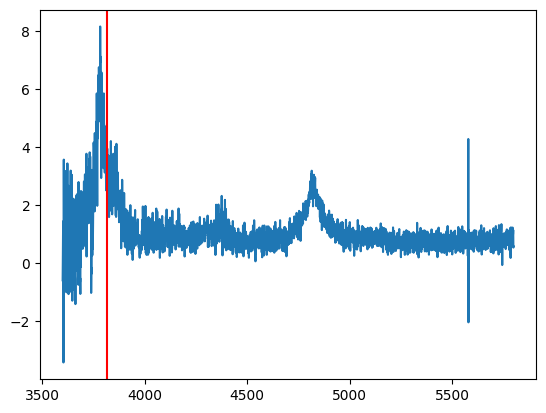

In [24]:
#As we can see we have now a table with only 49 elements, and most of the spectype is of the QSO kind.
#So now we now for a given TARGETID what is the corresponding redshift of the Quasar
# Now lets see if there is agrrement, by ploting the possition of the Lyman-alpha emission
# line for the first 10 elements in the catalog

lya=1216

for i,tid in enumerate(zcat["TARGETID"][9:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave,bflux[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

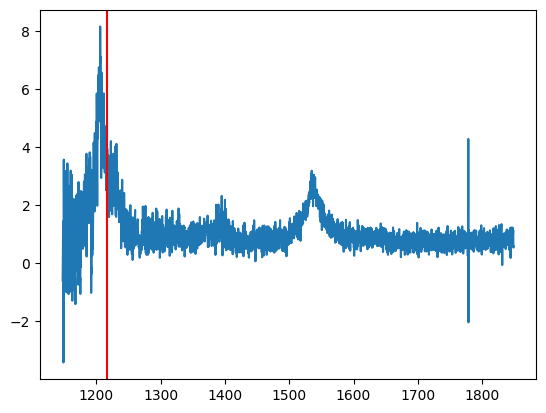

In [25]:
#No we can convert our spectra from the observed frame to restframe, to do so we need to convert the wavelentgh array
#for each of the spectra to the observed frame using the redhisft.
#Again, here is an example for the first ten spectra

lya=1216

for i,tid in enumerate(zcat["TARGETID"][9:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(bwave/(1+z),bflux[indx])
  plt.axvline(1216,color='red')
  plt.show()

Ejercicio: Ahora que puedes convertir los espectros al sistema en reposo, crea una matriz de longitudes de onda en el sistema en reposo que sea común para todos los espectros e interpola los espectros en dicha matriz. Para que todos sus espectros tengan la misma matriz de longitud de onda que antes y pueda aplicar ahora el análisis PCA.



In [198]:
zcat=Table.read("/content/drive/MyDrive/DESI_EDR/DESI_EDR/zall-pix-edr-vac.fits",hdu=1)
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [199]:
tids=Table(spec_file["FIBERMAP"].data)['TARGETID']
tids0=Table(spec_file0["FIBERMAP"].data)['TARGETID']
tids1=Table(spec_file1["FIBERMAP"].data)['TARGETID']
tids2==Table(spec_file2["FIBERMAP"].data)['TARGETID']

tids_total=[tids,tids0,tids1,tids2]

In [200]:
def masc(tids,zcat):
  mask=np.in1d(zcat["TARGETID"],tids)
  zcat=zcat[mask]
  return zcat

In [209]:
for i in tids_total:
  zcat_file=masc(i,zcat)
  z_ = zcat_file["Z"][0]
  np.mean(Bwave/(1+z_))

In [216]:
zcat_file=masc(tids,zcat)

In [217]:
zcat_file

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764218727224,sv3,QSO,2.1370347911252843
39627764222919195,sv3,QSO,2.5460148518383536
39627764222919677,sv3,QSO,2.5116209374418137
39627764222921791,sv3,QSO,2.1421198094951523
39627764222924517,sv3,QSO,2.2851727866116023
39627764227118438,sv3,QSO,3.630129643577127
39627764227118638,sv3,QSO,2.540430344832981
39627770258523079,sv3,QSO,1.5479191017583473
39627770258526411,sv3,QSO,2.470417839489763


In [219]:
z_= zcat_file["Z"][0]
bwave_ = bwave/(1+z_)

In [226]:
inter = np.zeros(np.shape(bflux_total))
for i in range(len(bflux_total[:,0])):
  inter_bflux = np.interp(bwave_,bwave, bflux_total[i])
  inter[i]=inter_bflux

array([[ 2.03046608,  2.03046608,  2.03046608, ...,  2.03046608,
         2.03046608,  2.03046608],
       [ 0.76645869,  0.76645869,  0.76645869, ...,  0.76645869,
         0.76645869,  0.76645869],
       [-1.25279772, -1.25279772, -1.25279772, ..., -1.25279772,
        -1.25279772, -1.25279772],
       ...,
       [ 9.92112923,  9.92112923,  9.92112923, ...,  9.92112923,
         9.92112923,  9.92112923],
       [-2.311409  , -2.311409  , -2.311409  , ..., -2.311409  ,
        -2.311409  , -2.311409  ],
       [ 2.92371058,  2.92371058,  2.92371058, ...,  2.92371058,
         2.92371058,  2.92371058]])

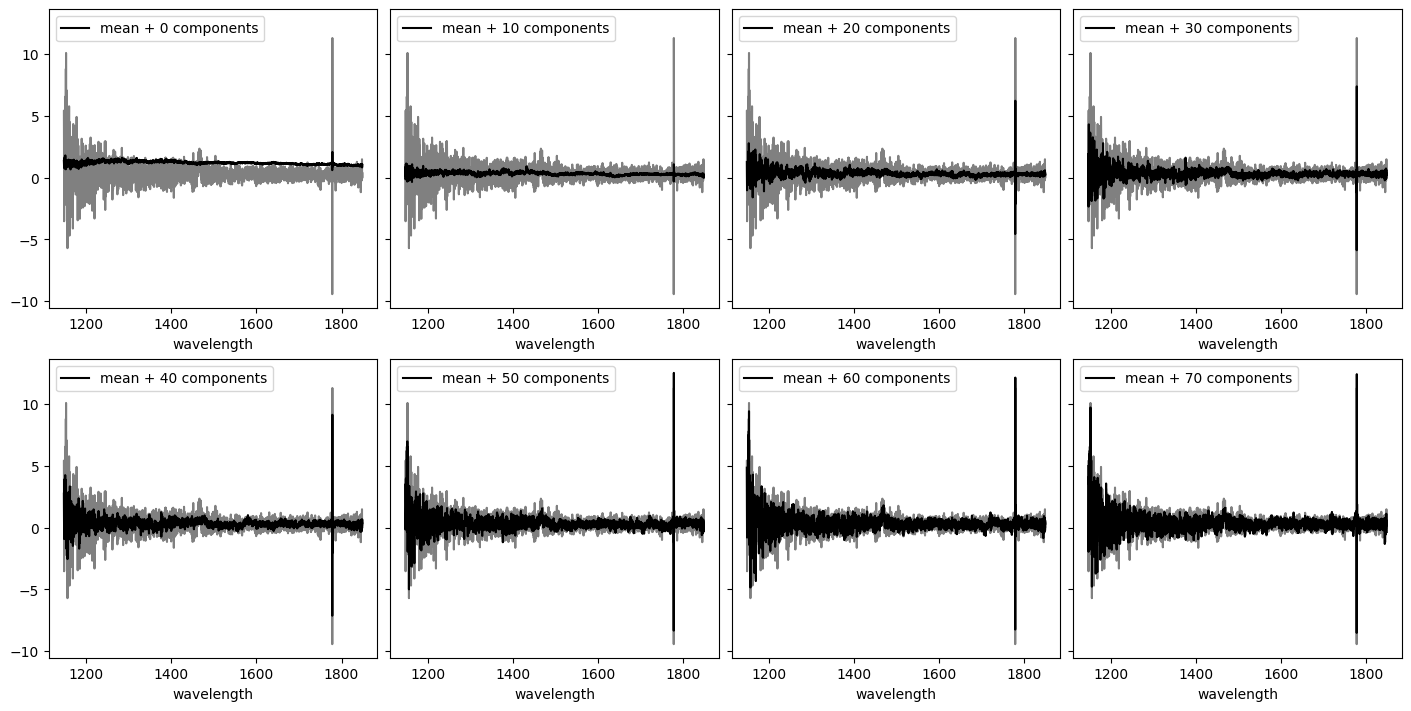

In [229]:
pca = PCA()
componentes_principales = pca.fit(bflux_total)

spec_mean = bflux_total.mean(0)
spec = bflux_total[100]
coeff = np.dot(components, spec-spec_mean)

nrows_ = 2
ncols_ = 4
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(14, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, [0, 10, 20, 30, 40, 50, 60, 70] ):
#for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.plot(bwave_, spec,'-', color='gray')
  ax.plot(bwave_, spec_mean + np.dot(coeff[:i], components[:i]), 'k',label = f'mean + {i} components')
  ax.legend()
  ax.set_xlabel('wavelength')